In [2]:
# 라이브러리 세팅 및 seaborn 한글 패치
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


In [3]:
train = pd.read_csv("train.csv")

In [15]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [16]:
train.dtypes

일시       object
최고기온    float64
최저기온    float64
일교차     float64
강수량     float64
평균습도    float64
평균풍속    float64
일조합     float64
일사합     float64
일조율     float64
평균기온    float64
dtype: object

In [17]:
train.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
최고기온,23008.0,17.071714,10.714471,-13.6,7.8,18.90,26.40,39.60
최저기온,23008.0,8.451960,10.578285,-20.2,-0.3,9.20,17.90,30.30
일교차,23007.0,8.619277,2.907096,1.0,6.6,8.60,10.60,19.60
강수량,9150.0,9.593683,21.966135,0.0,0.1,1.40,8.50,332.80
평균습도,23011.0,65.202851,14.549077,17.9,54.9,65.50,75.80,99.80
평균풍속,23007.0,2.380993,0.947595,0.1,1.7,2.20,2.90,7.80
일조합,22893.0,5.858826,3.816941,0.0,2.2,6.60,9.00,13.70
일사합,18149.0,11.933170,6.419122,0.0,7.0,11.22,16.62,33.48
일조율,22645.0,48.653526,31.662321,0.0,17.8,55.70,78.00,96.90
평균기온,23011.0,12.415419,10.489515,-16.4,3.4,13.80,21.80,33.70


In [19]:
train_copy = train.copy(deep=True)

array([[<AxesSubplot:title={'center':'최고기온'}>,
        <AxesSubplot:title={'center':'최저기온'}>,
        <AxesSubplot:title={'center':'일교차'}>],
       [<AxesSubplot:title={'center':'강수량'}>,
        <AxesSubplot:title={'center':'평균습도'}>,
        <AxesSubplot:title={'center':'평균풍속'}>],
       [<AxesSubplot:title={'center':'일조합'}>,
        <AxesSubplot:title={'center':'일사합'}>,
        <AxesSubplot:title={'center':'일조율'}>],
       [<AxesSubplot:title={'center':'평균기온'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

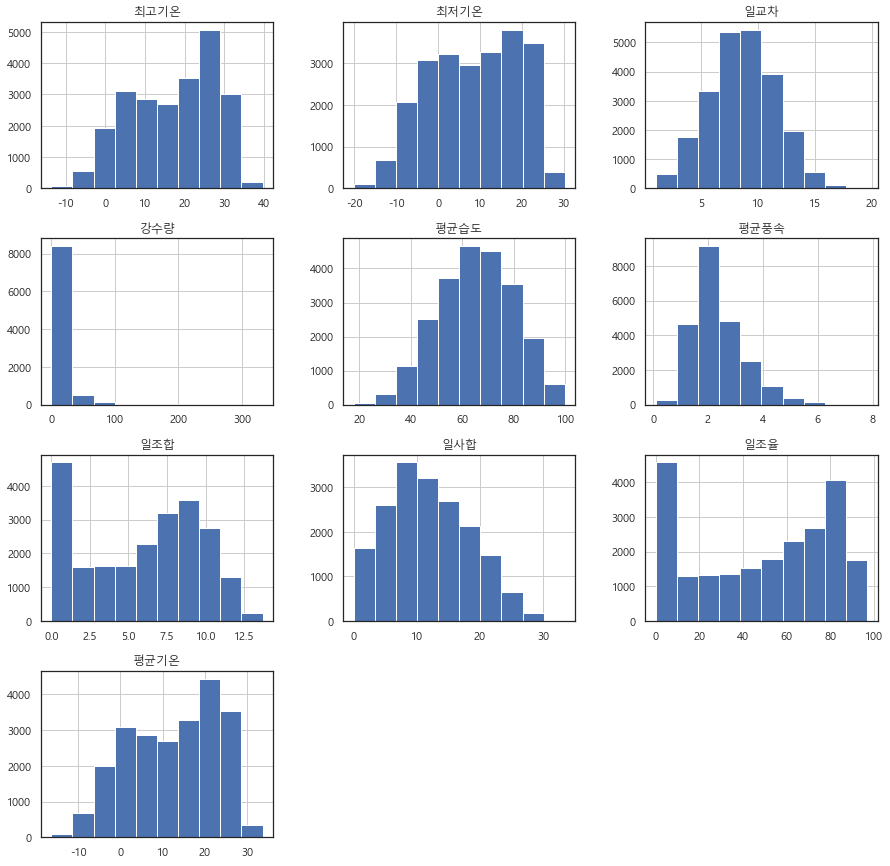

In [20]:
train_copy.hist(figsize=(15,15))

Null값에 대한 전처리. 

1. 우리나라의 경우 사계절이 뚜렸하고 시간의 흐름에 따른 기온의 변화가 대체로 일정하므로 비어있는 값은 바로 직전 값으로 대체하여 산출
2. 단, 강수량의 경우 일일 강수량이 없는 날도 상당 수 존재하므로 강수량의 NAN값은 0으로 처리

In [21]:
train_copy["최고기온"].fillna(train_copy["최고기온"].bfill(), inplace=True)
train_copy["최저기온"].fillna(train_copy["최저기온"].bfill(), inplace=True)
train_copy["일교차"].fillna(train_copy["일교차"].bfill(), inplace=True)
train_copy["평균풍속"].fillna(train_copy["평균풍속"].bfill(), inplace=True)
train_copy["일조합"].fillna(train_copy["일조합"].bfill(), inplace = True)
train_copy["일사합"].fillna(train_copy["일사합"].bfill(), inplace=True)
train_copy["일조율"].fillna(train_copy["일조율"].bfill(), inplace=True)
train_copy["강수량"].fillna(0, inplace=True)

In [22]:
train_copy.isnull().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

array([[<AxesSubplot:title={'center':'최고기온'}>,
        <AxesSubplot:title={'center':'최저기온'}>,
        <AxesSubplot:title={'center':'일교차'}>],
       [<AxesSubplot:title={'center':'강수량'}>,
        <AxesSubplot:title={'center':'평균습도'}>,
        <AxesSubplot:title={'center':'평균풍속'}>],
       [<AxesSubplot:title={'center':'일조합'}>,
        <AxesSubplot:title={'center':'일사합'}>,
        <AxesSubplot:title={'center':'일조율'}>],
       [<AxesSubplot:title={'center':'평균기온'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

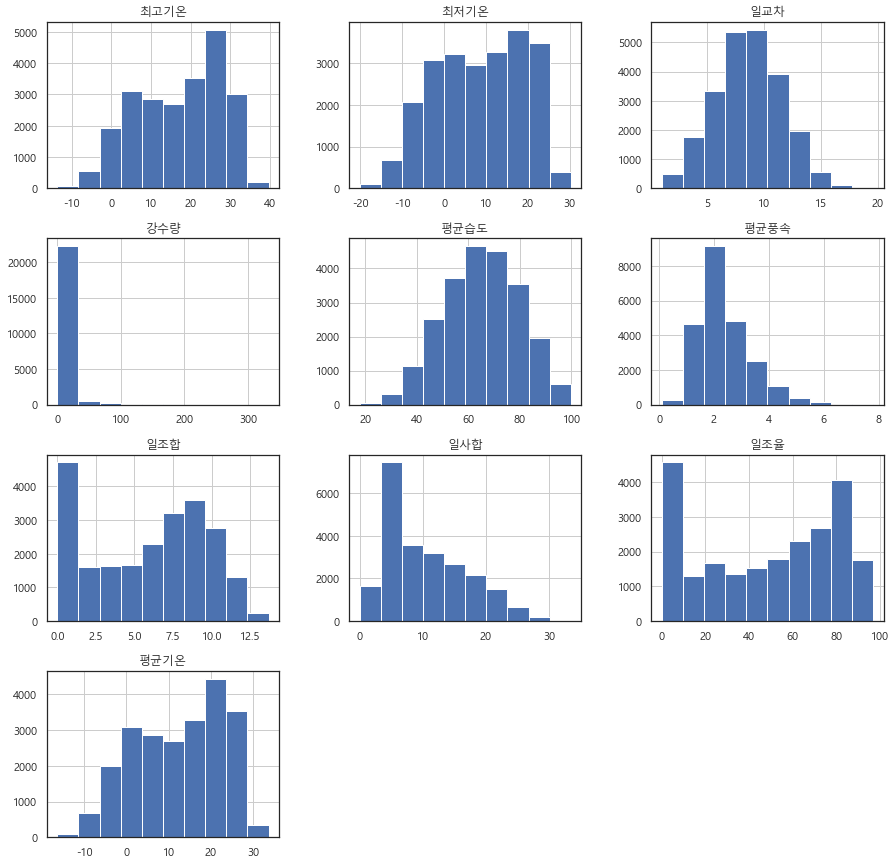

In [23]:
train_copy.hist(figsize=(15,15))

In [24]:
train_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
최고기온,23011.0,17.071257,10.714039,-13.6,7.80,18.90,26.40,39.60
최저기온,23011.0,8.452001,10.578244,-20.2,-0.30,9.20,17.90,30.30
일교차,23011.0,8.619291,2.907101,1.0,6.60,8.60,10.60,19.60
강수량,23011.0,3.814793,14.625229,0.0,0.00,0.00,0.50,332.80
평균습도,23011.0,65.202851,14.549077,17.9,54.90,65.50,75.80,99.80
평균풍속,23011.0,2.380900,0.947545,0.1,1.70,2.20,2.90,7.80
일조합,23011.0,5.857694,3.815408,0.0,2.20,6.60,9.00,13.70
일사합,23011.0,10.432268,6.402752,0.0,4.81,9.02,15.04,33.48
일조율,23011.0,48.326613,31.514588,0.0,18.60,54.70,77.75,96.90
평균기온,23011.0,12.415419,10.489515,-16.4,3.40,13.80,21.80,33.70


Correlation 확인을 위한 Heatmap 작성

In [25]:

train_heatmap = train_copy.drop(["일시"], axis=1)

<AxesSubplot:>

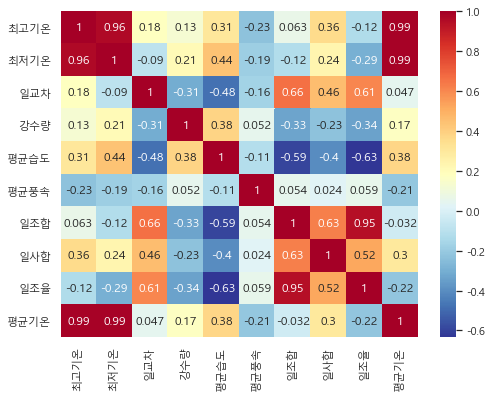

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(train_heatmap.corr(), annot=True, cmap = 'RdYlBu_r')

평균 기온에 어떤 변화가 있었는지 그 경향성을 파악하기 위한 시각화 작업 

In [125]:
# object 형태의 일시 컬럼을 날짜 형태로 변환 
train_copy["일시"] = pd.to_datetime(train_copy["일시"])

In [126]:
train_copy.dtypes

일시      datetime64[ns]
최고기온           float64
최저기온           float64
일교차            float64
강수량            float64
평균습도           float64
평균풍속           float64
일조합            float64
일사합            float64
일조율            float64
평균기온           float64
dtype: object

In [127]:
# 일자별 평균 기온을 보기 위해 연, 월, 일 컬럼 추가
train_copy['연'] = train_copy['일시'].dt.year
train_copy['월'] = train_copy['일시'].dt.month
train_copy['일'] = train_copy['일시'].dt.day

In [128]:
train_copy

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,연,월,일
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,4.81,28.1,-1.6,1960,1,1
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,4.81,28.1,-1.9,1960,1,2
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,4.81,28.1,4.0,1960,1,3
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,4.81,28.1,7.5,1960,1,4
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,4.81,28.1,-4.6,1960,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.1,69.8,1.8,8.8,10.25,91.7,-2.6,2022,12,27
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3,2022,12,28
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,2022,12,29
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,2022,12,30


In [129]:
g = train_copy.pivot_table('평균기온', '월','연', 'mean')
px.imshow(g)

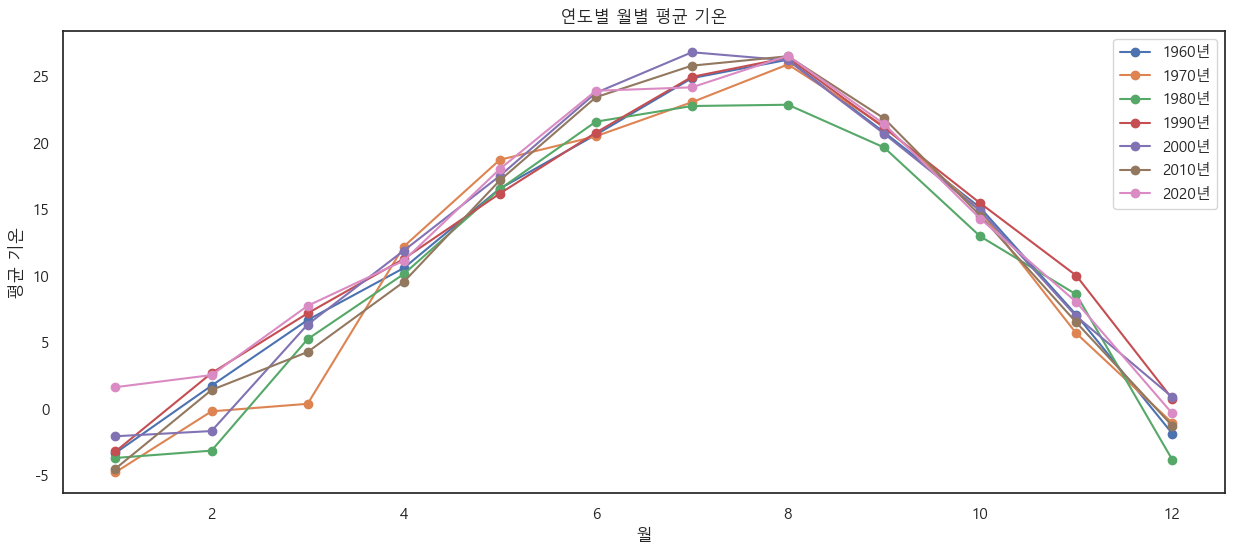

In [130]:
# 1960년 부터 2020년 까지의 월 평균 온도 변화 확인
train_summary = train_copy[train_copy['일시'].dt.year.isin([1960,1970,1980,1990,2000,2010,2020])] # 1960, 1970,1980,1990,2000,2010,2020년 데이터만 추출
train_summary
summary_groupby = train_summary.groupby(['연','월'])['평균기온'].mean().reset_index() # 연도와 월을 기준으로 Group화하고 DataFrame으로 변환

plt.figure(figsize=(15, 6))
for year in summary_groupby['연'].unique():
    df_year = summary_groupby[summary_groupby['연'] == year]
    plt.plot(df_year['월'], df_year['평균기온'], marker='o', label=f'{year}년')

# 그래프에 타이틀과 레이블 추가
plt.title('연도별 월별 평균 기온')
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.legend()  # 범례 표시

# 그래프 표시
plt.show()

Train, Test, Validation data 분할

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import math


X = train_copy.iloc[:,1:10]
y = train_copy['평균기온']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)



(13806, 9)
(4602, 9)
(13806,)
(4602,)
(4603, 9)
(4603,)


하이퍼파라미터 튜닝

In [160]:
params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}
rf_model = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_model, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최적 예측 정확도: 0.9974


RandomForestRegressor model 생성

In [161]:
rf_model = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=8, min_samples_split=8,n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=200, random_state=0)

In [162]:
# train mse, rmse
train_predict = rf_model.predict(X_train)
print("train data RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))))
print("train data MSE':{}".format(mean_squared_error(train_predict, y_train)))
# test mse, rmse
test_predict = rf_model.predict(X_test)
print("test data RMSE':{}".format(math.sqrt(mean_squared_error(test_predict, y_test))))
print("test data MSE':{}".format(mean_squared_error(test_predict, y_test)))
#validation mse, rmse
valid_predict = rf_model.predict(X_val)
print("validation data RMSE':{}".format(math.sqrt(mean_squared_error(valid_predict, y_val))))
print("validation data MSE':{}".format(mean_squared_error(valid_predict, y_val)))


train data RMSE':0.4770655675164248
train data MSE':0.22759155570976847
test data RMSE':0.5259443369618785
test data MSE':0.27661744558227
validation data RMSE':0.5312405287662662
validation data MSE':0.28221649940386206
